# Exploratory Data Analysis

## Installs, imports, etc.

In [ ]:
# !pip install tensorflow-data-validation

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_data_validation
import numpy as np

import pandas as pd
import seaborn as sns
import sklearn

## Load dataset and display some examples

The `bee_dataset` contains images and a set of labels that expose certain characterisitics of that images, such as varroa-mite infections, bees carrying pollen-packets or bee that are cooling the hive by flappingn their wings. Additionally, this dataset contains images of wasps to be able to distinguish bees and wasps.

In [3]:
(bee_ds, ), info = tfds.load(
    name='bee_dataset',
    with_info=True,
    split=['train', ],
    as_supervised=True,
    shuffle_files=False,
)

OK, let's see some examples.

2023-10-04 10:35:23.486505: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


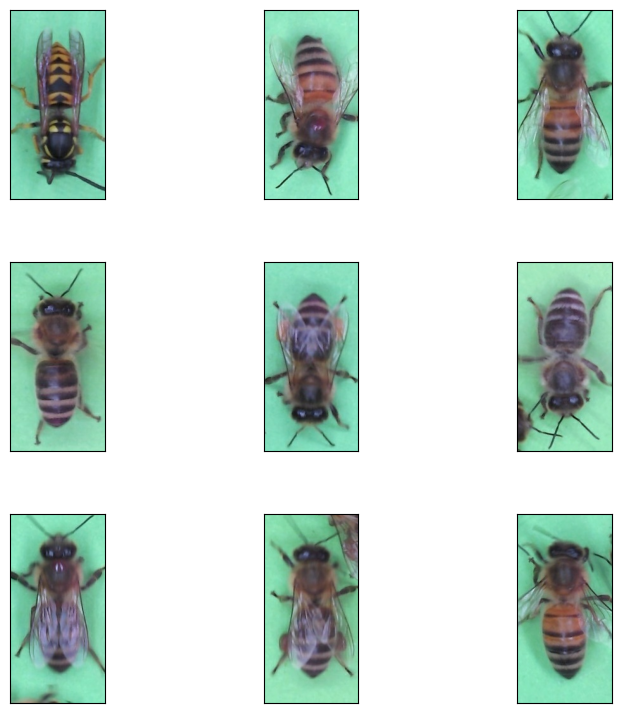

In [4]:
fig = tfds.show_examples(bee_ds, info)

2023-10-04 10:35:26.907574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,input,output/cooling_output,output/pollen_output,output/varroa_output,output/wasps_output
0,,0.0,0.0,0.0,1.0
1,,0.0,0.0,1.0,0.0
2,,0.0,0.0,0.0,0.0
3,,1.0,0.0,0.0,0.0
4,,0.0,1.0,0.0,0.0

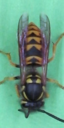
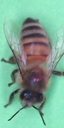
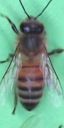
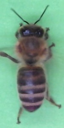
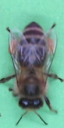

In [5]:
tfds.as_dataframe(bee_ds.take(5), info)

Cool, `bee_dataset` is multi-labeled. Nut we only care about `varroa_output`.

In [15]:
varroa_ds = bee_ds.map(lambda x, y: (x, y["varroa_output"]))

,input,output
0,,0.0
1,,1.0
2,,0.0
3,,0.0
4,,0.0

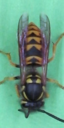
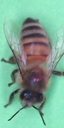
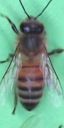
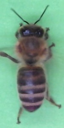
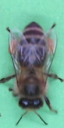

In [16]:
tfds.as_dataframe(varroa_ds.take(5), info)

## Class imbalance?

<Axes: ylabel='Count'>

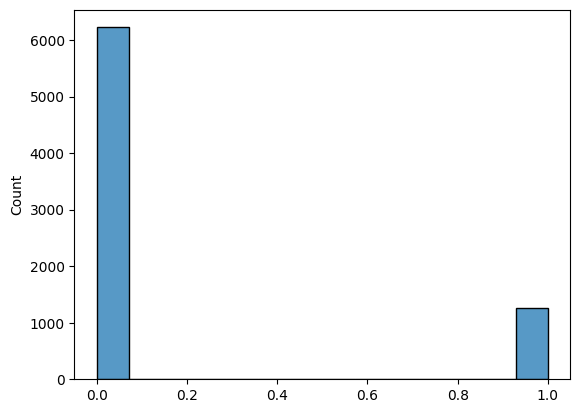

In [18]:
sns.histplot(
    data=np.fromiter(varroa_ds.map(lambda x, y: y), int),
)

Yikes, when training a classifier, we need to take care of class imbalance! Under/over sampling not really an option here, so let's go with class weighted learning...

In [19]:
sklearn.utils.class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.fromiter(bee_ds.map(lambda x, y: y["varroa_output"]), float)),
    y=np.fromiter(bee_ds.map(lambda x, y: y["varroa_output"]), float),
)

array([0.60170308, 2.95813586])